# Molecular Dynamics Simulations in EMPP 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'axes.labelsize': 10,
                     'axes.titlesize': 10,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})

def get_size(w,h):
    return((w/2.54,h/2.54))

## Lenard-Jones Potential

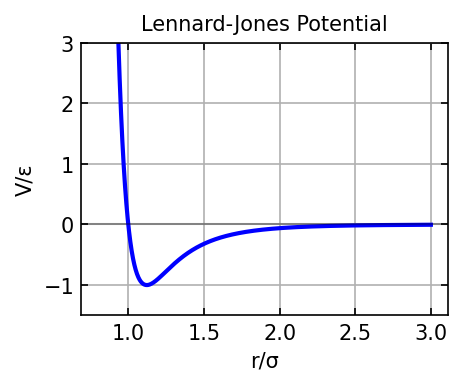

In [2]:
def lennard_jones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

r = np.linspace(0.8, 3, 1000)
V = lennard_jones(r)

plt.figure(figsize=get_size(8, 6),dpi=150)
plt.plot(r, V, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('r/σ')
plt.ylabel('V/ε')
plt.title('Lennard-Jones Potential')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-1.5, 3)
plt.show()

## Taylor Expansion

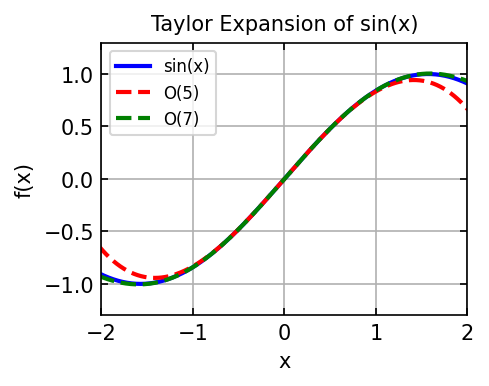

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(x)
y_taylor = x - 1/6*x**3
y_taylor1 = x - 1/6*x**3+x**5/120


plt.figure(figsize=get_size(8, 6),dpi=150)
plt.plot(x, y, 'b-', label='sin(x)', linewidth=2)
plt.plot(x, y_taylor, 'r--', label='O(5)', linewidth=2)
plt.plot(x, y_taylor1, 'g--', label='O(7)', linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2,2)
plt.ylim(-1.3,1.3)
plt.title('Taylor Expansion of sin(x)')
plt.legend()
plt.show()

## Velocity Verlet 

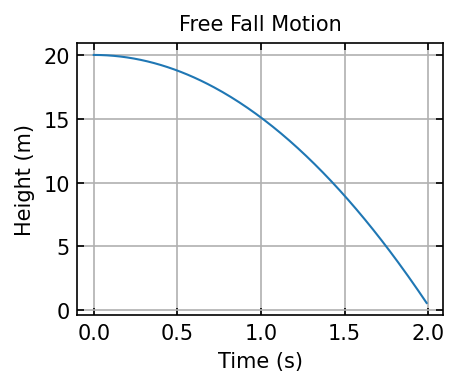

In [12]:
g = 9.81  # m/s^2
dt = 0.01  # time step
t_max = 2.0  # total simulation time
steps = int(t_max/dt)

# Initial conditions
y0 = 20.0  # initial height
v0 = 0.0   # initial velocity


# Arrays to store results
t = np.zeros(steps)
y = np.zeros(steps)
v = np.zeros(steps)
a = np.zeros(steps)

# Initial values
y[0] = y0
v[0] = v0
a[0] = -g

# Velocity Verlet integration
for i in range(1, steps):
    t[i] = i * dt
    y[i] = y[i-1] + v[i-1] * dt + 0.5 * a[i-1] * dt**2  # update position
    a_new = -g                                          # new acceleration (assuming constant gravity)
    v[i] = v[i-1] + 0.5 * (a[i-1] + a_new) * dt  # update velocity
    a[i] = a_new  # store new acceleration

plt.figure(figsize=get_size(8, 6), dpi=150)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Free Fall Motion')
plt.grid(True)
plt.show()

## Class for an Atom
